In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_

In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
#df = pd.read_csv('Resources\hawaii_measurements.csv')



# reflect the tables

Base = automap_base()
# access your tables as classes


# perform queries using the session


# do something with the results


In [6]:
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23dc5e76eb0>,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
for row in session.query(measurement.date).all():
    print(row)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
last_date = session.query(func.min(measurement.date)).scalar()
print(most_recent_date)

# Find the most recent date in the DataFrame


2017-08-23


In [13]:
most_recent_datetime = datetime.strptime(most_recent_date, '%Y-%m-%d')
most_recent_datetime

datetime.datetime(2017, 8, 23, 0, 0)

In [14]:

one_year_from_last_date = most_recent_datetime - timedelta(days=365)
one_year_from_last_date

datetime.datetime(2016, 8, 23, 0, 0)

(365, 1)


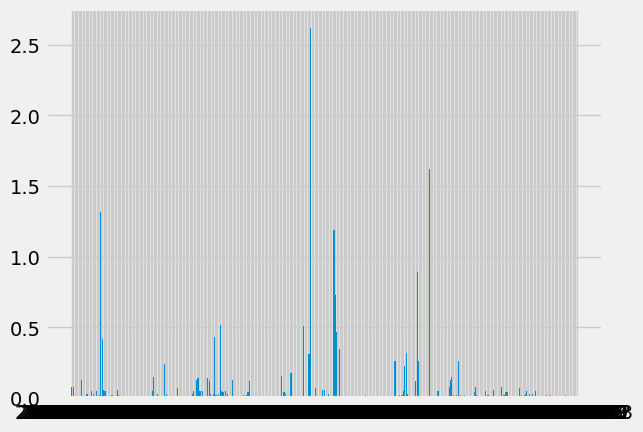

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
# precepitation_data = session.query(measurement.date, func.avg(measurement.prcp))\
#     .filter(and_(measurement.date>one_year_from_last_date, measurement.date < most_recent_datetime))\
#     .group_by(measurement.date).all()

precepitation_data = session.query(measurement.date, measurement.prcp)\
    .filter(and_(measurement.date>one_year_from_last_date, measurement.date < most_recent_datetime))\
    .group_by(measurement.date)\
    .order_by(measurement.date).all()

df = pd.DataFrame(precepitation_data, columns=["date","prcp"])
df2 = df.set_index("date")
df2.sort_index(ascending=False)
print(df2.shape)
# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
x_axis = df2.index

y_axis = df2["prcp"]
plt.bar(x_axis,y_axis)
plt.show()


In [43]:
prcp_dict = df2.to_dict()["prcp"]
prcp_dict

{'2016-08-24': 0.08,
 '2016-08-25': 0.08,
 '2016-08-26': 0.0,
 '2016-08-27': 0.0,
 '2016-08-28': 0.01,
 '2016-08-29': 0.0,
 '2016-08-30': 0.0,
 '2016-08-31': 0.13,
 '2016-09-01': 0.0,
 '2016-09-02': 0.0,
 '2016-09-03': 0.0,
 '2016-09-04': 0.03,
 '2016-09-05': nan,
 '2016-09-06': nan,
 '2016-09-07': 0.05,
 '2016-09-08': 0.0,
 '2016-09-09': 0.03,
 '2016-09-10': 0.0,
 '2016-09-11': 0.05,
 '2016-09-12': 0.0,
 '2016-09-13': 0.02,
 '2016-09-14': 1.32,
 '2016-09-15': 0.42,
 '2016-09-16': 0.06,
 '2016-09-17': 0.05,
 '2016-09-18': 0.0,
 '2016-09-19': 0.0,
 '2016-09-20': 0.0,
 '2016-09-21': 0.0,
 '2016-09-22': 0.02,
 '2016-09-23': 0.0,
 '2016-09-24': 0.0,
 '2016-09-25': 0.0,
 '2016-09-26': 0.06,
 '2016-09-27': 0.02,
 '2016-09-28': 0.0,
 '2016-09-29': 0.0,
 '2016-09-30': 0.0,
 '2016-10-01': 0.0,
 '2016-10-02': 0.0,
 '2016-10-03': 0.0,
 '2016-10-04': 0.0,
 '2016-10-05': 0.0,
 '2016-10-06': 0.0,
 '2016-10-07': 0.0,
 '2016-10-08': 0.0,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 '2016-10-11': 0.0,
 '20

In [44]:
{x[0]:x[1] for x in precepitation_data}

{'2016-08-24': 0.08,
 '2016-08-25': 0.08,
 '2016-08-26': 0.0,
 '2016-08-27': 0.0,
 '2016-08-28': 0.01,
 '2016-08-29': 0.0,
 '2016-08-30': 0.0,
 '2016-08-31': 0.13,
 '2016-09-01': 0.0,
 '2016-09-02': 0.0,
 '2016-09-03': 0.0,
 '2016-09-04': 0.03,
 '2016-09-05': None,
 '2016-09-06': None,
 '2016-09-07': 0.05,
 '2016-09-08': 0.0,
 '2016-09-09': 0.03,
 '2016-09-10': 0.0,
 '2016-09-11': 0.05,
 '2016-09-12': 0.0,
 '2016-09-13': 0.02,
 '2016-09-14': 1.32,
 '2016-09-15': 0.42,
 '2016-09-16': 0.06,
 '2016-09-17': 0.05,
 '2016-09-18': 0.0,
 '2016-09-19': 0.0,
 '2016-09-20': 0.0,
 '2016-09-21': 0.0,
 '2016-09-22': 0.02,
 '2016-09-23': 0.0,
 '2016-09-24': 0.0,
 '2016-09-25': 0.0,
 '2016-09-26': 0.06,
 '2016-09-27': 0.02,
 '2016-09-28': 0.0,
 '2016-09-29': 0.0,
 '2016-09-30': 0.0,
 '2016-10-01': 0.0,
 '2016-10-02': 0.0,
 '2016-10-03': 0.0,
 '2016-10-04': 0.0,
 '2016-10-05': 0.0,
 '2016-10-06': 0.0,
 '2016-10-07': 0.0,
 '2016-10-08': 0.0,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 '2016-10-11': 0.0,
 '

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df2.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
measurement_query = session.query(measurement.station).count()
print(measurement_query)

19550


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_query = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
station_query_first = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).limit(1).all()
station_query_first

[('USC00519281', 2772)]

In [20]:
most_active_station_query = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    limit(1)
most_active_station_query

In [21]:
most_active_station_id = most_active_station_query.first()[0]
most_active_station_id

'USC00519281'

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
.filter(measurement.station == most_active_station_id).all()
active_station

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_rows = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date >= one_year_from_last_date).all()
temps = [temp[0] for temp in temp_rows]
temps

[77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,
 69.0,

In [46]:
rows = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date >= one_year_from_last_date).all()


{x[0]:x[1] for x in rows}

{'2016-08-24': 77.0,
 '2016-08-25': 80.0,
 '2016-08-26': 80.0,
 '2016-08-27': 75.0,
 '2016-08-28': 73.0,
 '2016-08-29': 78.0,
 '2016-08-30': 77.0,
 '2016-08-31': 78.0,
 '2016-09-01': 80.0,
 '2016-09-02': 80.0,
 '2016-09-03': 78.0,
 '2016-09-04': 78.0,
 '2016-09-05': 78.0,
 '2016-09-06': 73.0,
 '2016-09-07': 74.0,
 '2016-09-08': 80.0,
 '2016-09-09': 79.0,
 '2016-09-10': 77.0,
 '2016-09-11': 80.0,
 '2016-09-12': 76.0,
 '2016-09-13': 79.0,
 '2016-09-14': 75.0,
 '2016-09-15': 79.0,
 '2016-09-16': 78.0,
 '2016-09-17': 79.0,
 '2016-09-18': 78.0,
 '2016-09-19': 78.0,
 '2016-09-20': 76.0,
 '2016-09-21': 74.0,
 '2016-09-22': 77.0,
 '2016-09-23': 78.0,
 '2016-09-24': 79.0,
 '2016-09-25': 79.0,
 '2016-09-26': 77.0,
 '2016-09-27': 80.0,
 '2016-09-28': 78.0,
 '2016-09-29': 78.0,
 '2016-09-30': 78.0,
 '2016-10-01': 77.0,
 '2016-10-02': 79.0,
 '2016-10-03': 79.0,
 '2016-10-04': 79.0,
 '2016-10-05': 79.0,
 '2016-10-06': 75.0,
 '2016-10-07': 76.0,
 '2016-10-08': 73.0,
 '2016-10-09': 72.0,
 '2016-10-10'

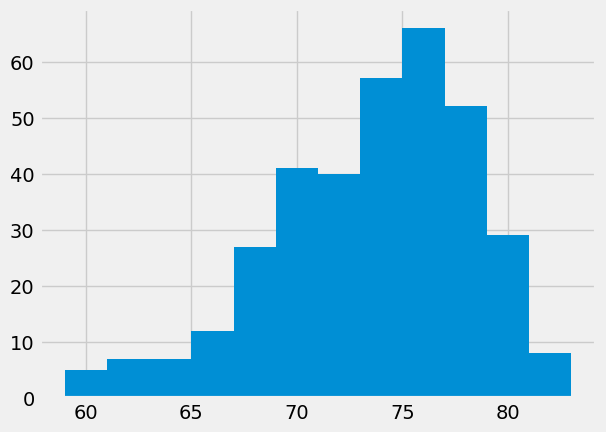

In [24]:
plt.hist(temps, bins=12)
plt.show()

# Close session

In [25]:
# Close Session
session.close()